In [74]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA

# Define the tickers, start date, and end date
tickers = ["^GSPC", "AAPL", "NVDA", "MSFT", "NFLX", "RDDT"]
start_date = "2020-01-01"
end_date = "2025-01-01"

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)

# Save the data to a CSV file
data.to_csv("/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/stocks.csv")

# Read the data from the CSV file
stocks = pd.read_csv("/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/stocks.csv")

[*********************100%***********************]  6 of 6 completed


In [76]:
print(stocks.head())

        Price              Close  ... Volume.4    Volume.5
0      Ticker               AAPL  ...     RDDT       ^GSPC
1        Date                NaN  ...      NaN         NaN
2  2020-01-02  72.71609497070312  ...      NaN  3459930000
3  2020-01-03  72.00910949707031  ...      NaN  3484700000
4  2020-01-06  72.58291625976562  ...      NaN  3702460000

[5 rows x 31 columns]


In [77]:
#After mannually changing dataset 
stock = pd.read_csv("/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/stocks.csv")
print(stock.head())

         Date          SPX       AAPL        MSFT        NFLX      NVDA  RDDT
0  02/01/2020  3244.670000  71.721042  151.566834  326.100006  5.943832   NaN
1  03/01/2020  3226.360107  71.940000  151.127749  326.779999  5.852962   NaN
2  06/01/2020  3217.550049  71.127873  149.944070  323.119995  5.783753   NaN
3  07/01/2020  3241.860107  72.592609  152.082316  336.470001  5.930139   NaN
4  08/01/2020  3238.590088  71.940000  151.710031  331.490000  5.970000   NaN


In [81]:
stock = stock.round(2)
stock.to_csv("/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/stocks.csv", index=False)

In [82]:
print(stock.head())
print(stock.tail())

         Date      SPX   AAPL    MSFT    NFLX  NVDA  RDDT
0  02/01/2020  3244.67  71.72  151.57  326.10  5.94   NaN
1  03/01/2020  3226.36  71.94  151.13  326.78  5.85   NaN
2  06/01/2020  3217.55  71.13  149.94  323.12  5.78   NaN
3  07/01/2020  3241.86  72.59  152.08  336.47  5.93   NaN
4  08/01/2020  3238.59  71.94  151.71  331.49  5.97   NaN
            Date      SPX    AAPL    MSFT    NFLX    NVDA    RDDT
1253  24/12/2024  5984.63  255.21  433.78  915.00  140.00  169.00
1254  26/12/2024  6024.97  257.91  438.20  928.40  139.70  177.80
1255  27/12/2024  6006.17  257.55  433.73  916.01  138.55  175.53
1256  30/12/2024  5920.67  251.95  425.21  894.51  134.83  167.38
1257  31/12/2024  5919.74  252.16  425.25  901.80  138.03  166.00


In [83]:
#Verifying whether our 'Date' column has been time set
if isinstance(stock.index, pd.DatetimeIndex):
    print("The index is a datetime index")
else:
    print("Not yet")

Not yet


In [93]:
stock = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format with day first
stock['Date'] = pd.to_datetime(stock['Date'], dayfirst=True)
stock.set_index('Date', inplace=True)

print(stock.head())

                SPX   AAPL    MSFT    NFLX  NVDA  RDDT
Date                                                  
2020-01-02  3244.67  71.72  151.57  326.10  5.94   NaN
2020-01-03  3226.36  71.94  151.13  326.78  5.85   NaN
2020-01-06  3217.55  71.13  149.94  323.12  5.78   NaN
2020-01-07  3241.86  72.59  152.08  336.47  5.93   NaN
2020-01-08  3238.59  71.94  151.71  331.49  5.97   NaN


In [100]:
print(stock.dtypes)

SPX     float64
AAPL    float64
MSFT    float64
NFLX    float64
NVDA    float64
RDDT    float64
dtype: object


Text(0.5, 1.0, 'S&P 500 Prices')

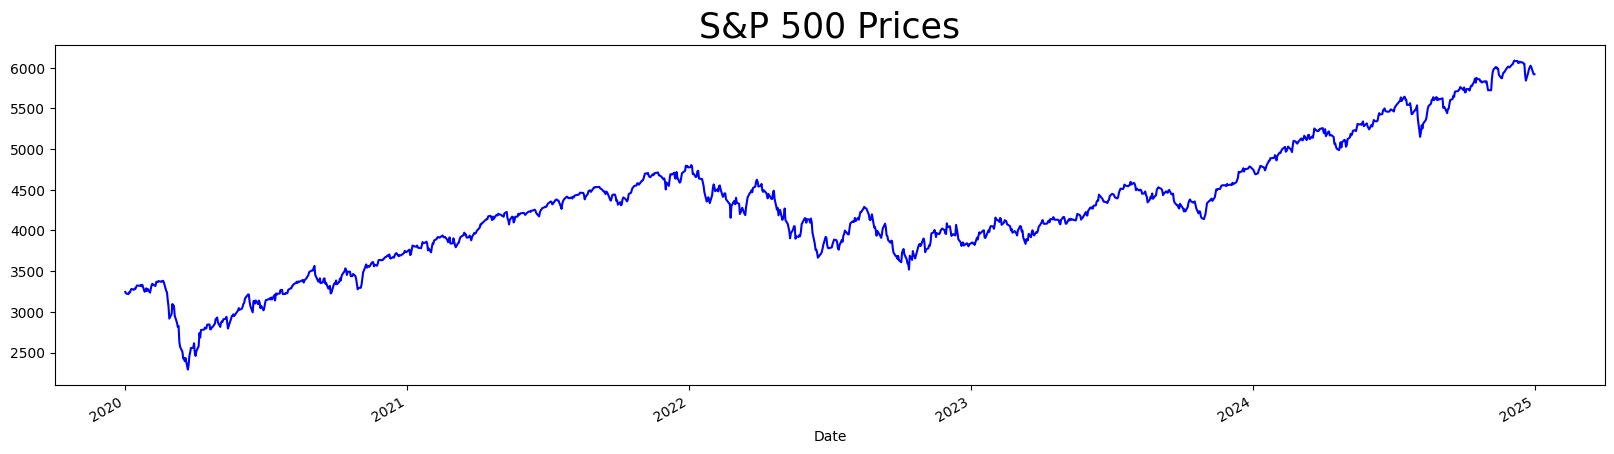

In [ ]:
import matplotlib.pyplot as plt
stock.SPX.plot(figsize = (20,5), color = "blue")
plt.title("S&P 500 Prices", size=25)

Text(0.5, 1.0, 'Apple Prices')

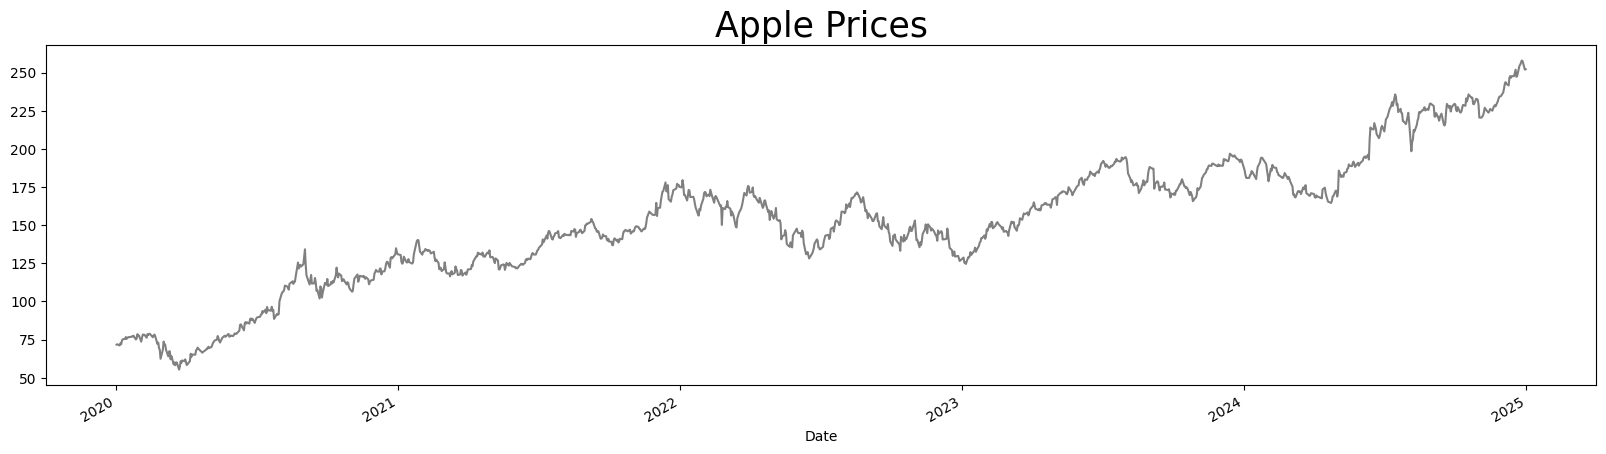

In [105]:
stock.AAPL.plot(figsize = (20,5), color = "grey")
plt.title("Apple Prices", size=25)

Text(0.5, 1.0, 'Nvidia Prices')

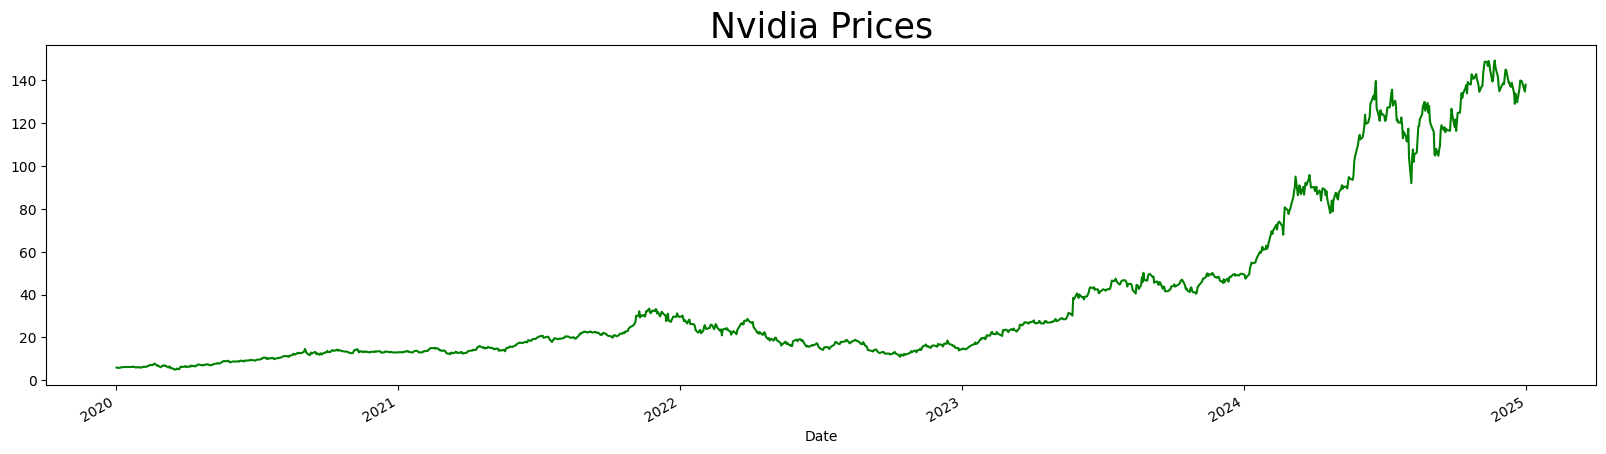

In [106]:
stock.NVDA.plot(figsize = (20,5), color = "green")
plt.title("Nvidia Prices", size=25)

Text(0.5, 1.0, 'Microsoft Prices')

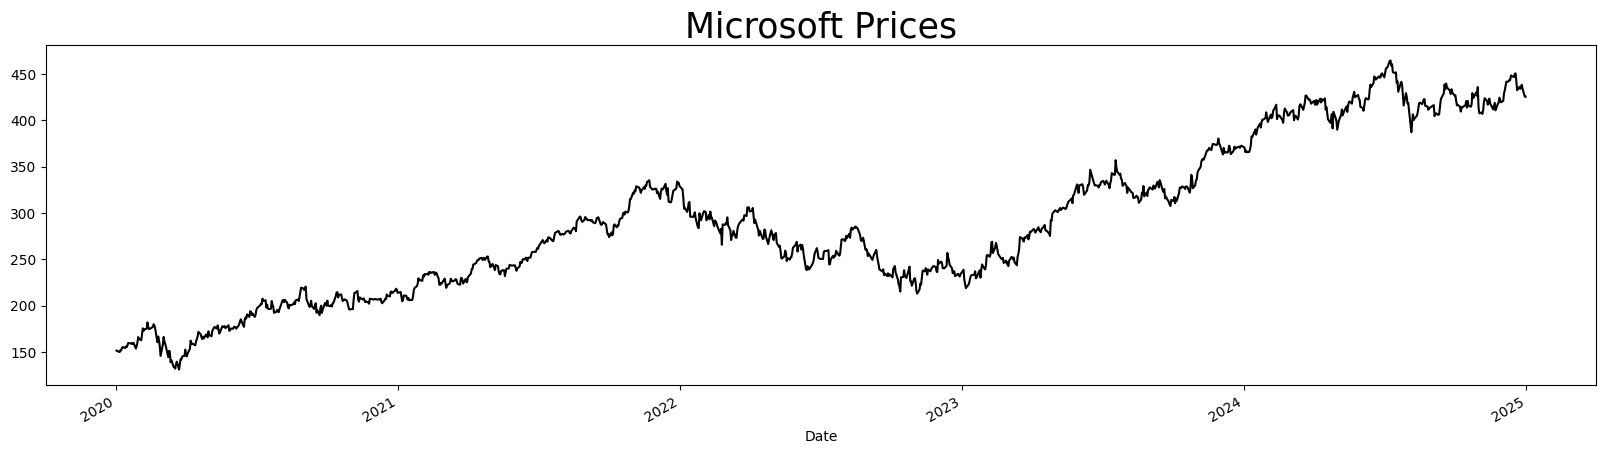

In [111]:
stock.MSFT.plot(figsize = (20,5), color = "black")
plt.title("Microsoft Prices", size=25)

Text(0.5, 1.0, 'Netflix Prices')

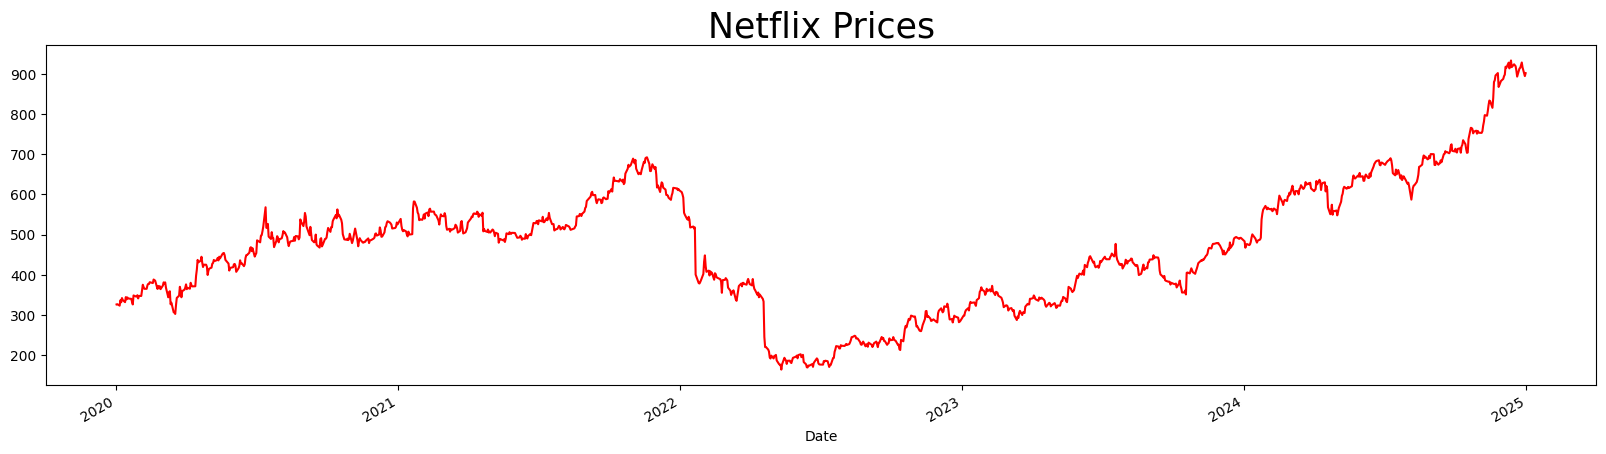

In [112]:
stock.NFLX.plot(figsize = (20,5), color = "red")
plt.title("Netflix Prices", size=25)

Text(0.5, 1.0, 'Reddit Prices')

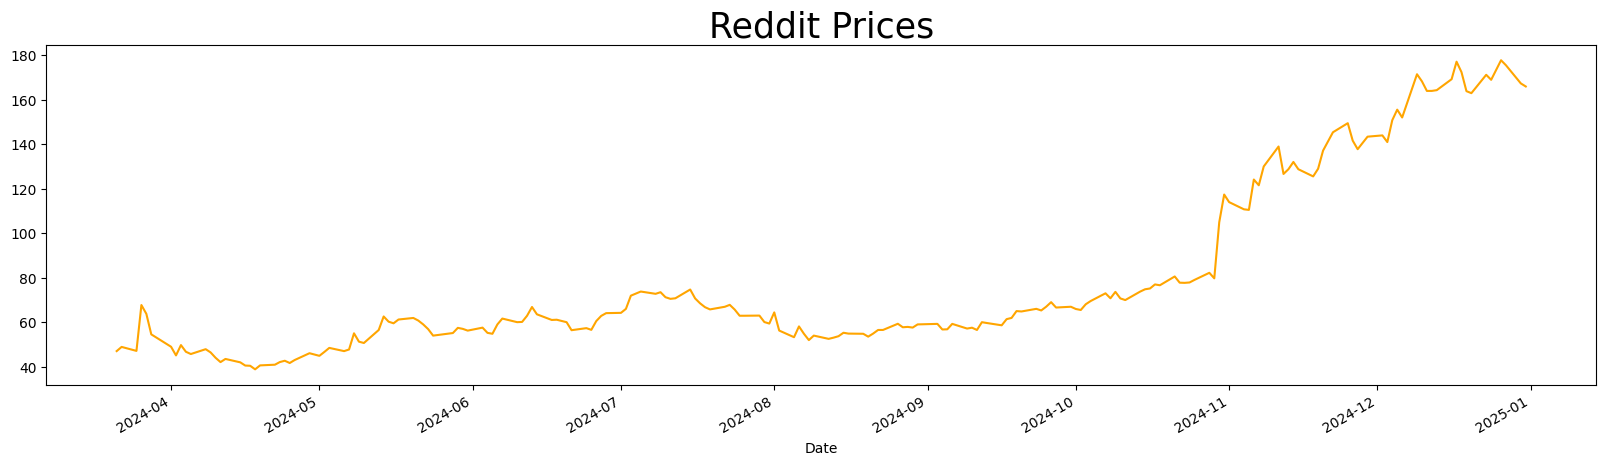

In [113]:
stock.RDDT.plot(figsize = (20,5), color = "orange")
plt.title("Reddit Prices", size=25)

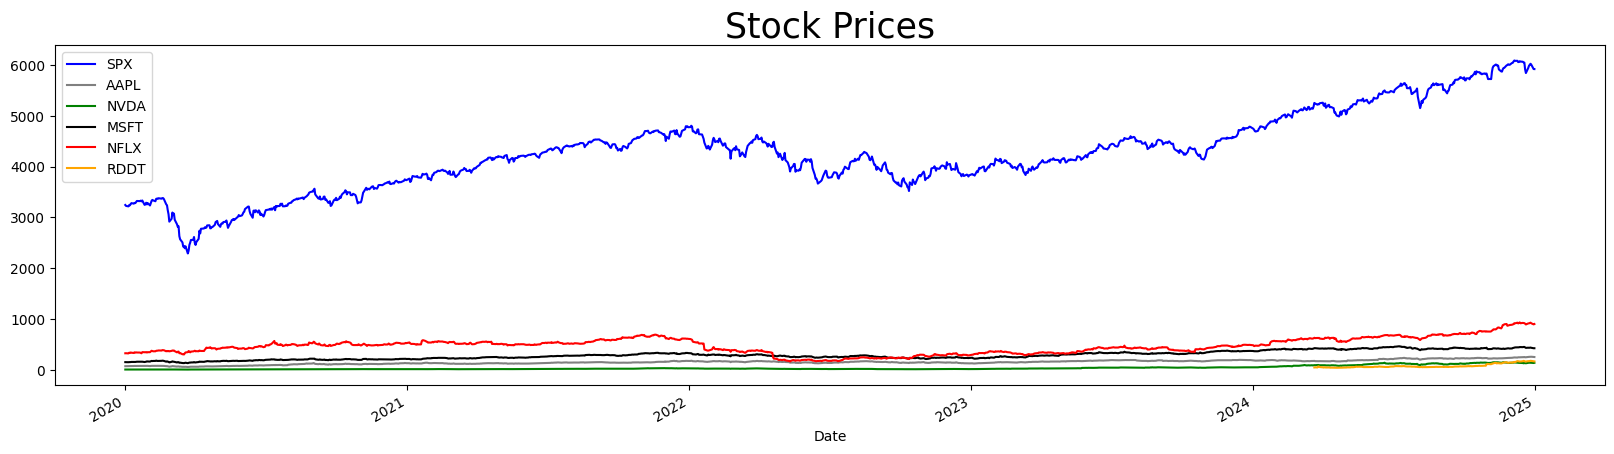

In [114]:
stock.SPX.plot(figsize = (20,5), color = "blue")
stock.AAPL.plot(figsize = (20,5), color = "grey")
stock.NVDA.plot(figsize = (20,5), color = "green")
stock.MSFT.plot(figsize = (20,5), color = "black")
stock.NFLX.plot(figsize = (20,5), color = "red")
stock.RDDT.plot(figsize = (20,5), color = "orange")
plt.title("Stock Prices", size=25)
plt.legend()


### Normalising prices so that we get the same relative value, easier for analysis


In [115]:
normalised_stocks = stock/stock.iloc[0] * 100

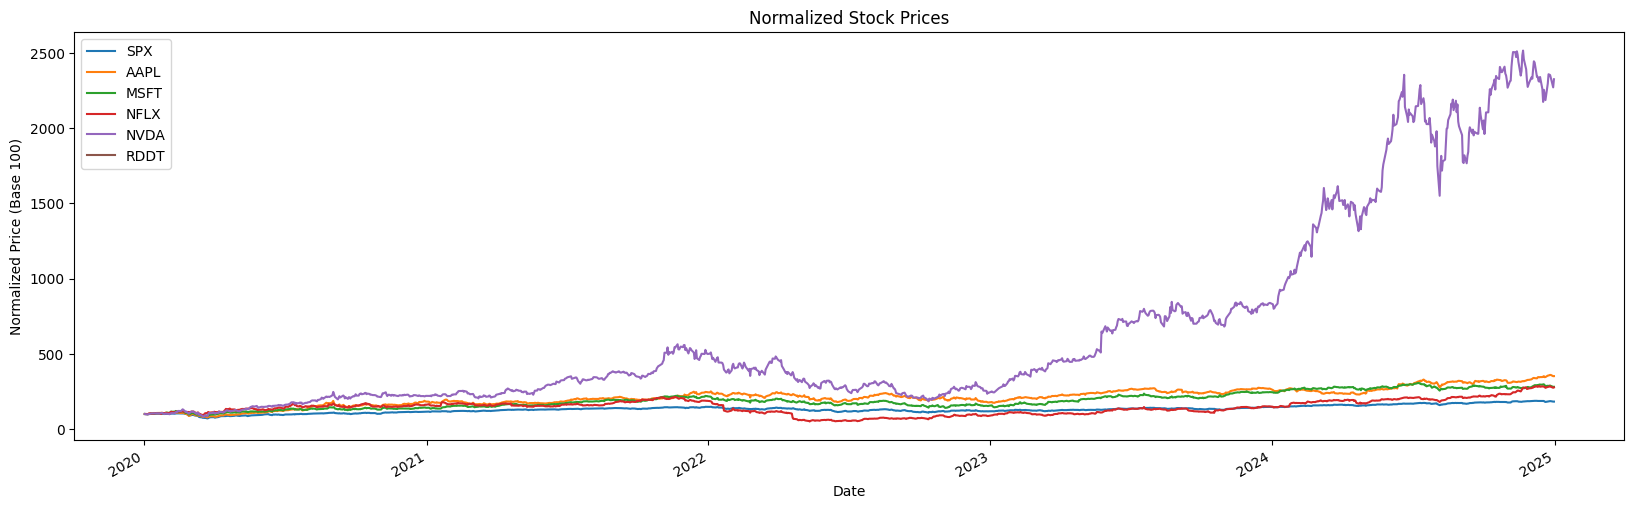

In [117]:
normalised_stocks.plot(figsize=(20, 6))
plt.title("Normalized Stock Prices")
plt.xlabel("Date")
plt.ylabel("Normalized Price (Base 100)")
plt.legend()
plt.show()